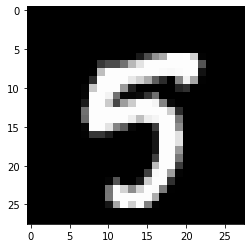

In [1]:
import matplotlib.pyplot as plt
from matplotlib import image

image_5 = image.imread('./images/5.png')
plt.imshow(image_5)

In [2]:
import torch
import torch.nn.functional as F

class NeuralNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 512)
        self.fc2 = torch.nn.Linear(512, 256)
        self.fc3 = torch.nn.Linear(256, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
import torchvision
import torchvision.transforms as transforms
transform = transforms.ToTensor()

train_set = torchvision.datasets.MNIST(
    root='./data/', train=True, transform=transform, download=True)
test_set = torchvision.datasets.MNIST(
    root='./data/', train=False, transform=transform, download=True)
train_set.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [4]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=5)

In [5]:
net = NeuralNet()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(3):
    for batch_id, (images, targets) in enumerate(train_loader):
        optimizer.zero_grad()

        outputs = net(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        last_loss = loss.item()
        if batch_id % 500 == 0:
            predictions = outputs.argmax(-1)
            accuracy = (targets == predictions).float().mean()
            print(f'Batch {batch_id}: Loss is {last_loss:.2} Accuracy is {accuracy:.2}')
    print(f'Epoch {epoch}: Loss is {last_loss:.2}')

print('Finished Training')

Batch 0: Loss is 2.3 Accuracy is 0.12
Batch 500: Loss is 1.9 Accuracy is 0.56
Batch 1000: Loss is 0.63 Accuracy is 0.81
Batch 1500: Loss is 0.4 Accuracy is 0.94
Epoch 0: Loss is 0.27
Batch 0: Loss is 0.61 Accuracy is 0.84
Batch 500: Loss is 0.54 Accuracy is 0.81
Batch 1000: Loss is 0.38 Accuracy is 0.88
Batch 1500: Loss is 0.23 Accuracy is 0.94
Epoch 1: Loss is 0.17
Batch 0: Loss is 0.37 Accuracy is 0.94
Batch 500: Loss is 0.39 Accuracy is 0.88
Batch 1000: Loss is 0.37 Accuracy is 0.91
Batch 1500: Loss is 0.2 Accuracy is 0.94
Epoch 2: Loss is 0.13
Finished Training


In [6]:
def print_metrics(net):
    num_samples = 0
    num_true_predictions = 0
    
    with torch.no_grad():
        for images, targets in test_loader:
            outputs = net(images)
            predictions = outputs.argmax(-1)
            num_samples += images.shape[0]
            num_true_predictions += (targets == predictions).float().sum()
    accuracy = num_true_predictions / num_samples
    print(f'Accuracy: {accuracy:.2}')
    plt.show()

In [7]:
net = NeuralNet()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

print('Initial metrics')
print_metrics(net)

for epoch in range(3):
    for batch_id, (images, targets) in enumerate(train_loader):
        optimizer.zero_grad()

        outputs = net(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        last_loss = loss.item()
    
    print(f'Epoch {epoch}: Loss is {last_loss}')
    print_metrics(net)

print('Finished Training')

Initial metrics
Accuracy: 0.097
Epoch 0: Loss is 0.28633031249046326
Accuracy: 0.88
Epoch 1: Loss is 0.18668504059314728
Accuracy: 0.91
Epoch 2: Loss is 0.14450521767139435
Accuracy: 0.92
Finished Training


In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [9]:
example_cm = confusion_matrix(
    y_true=[0, 1, 2, 0, 1, 2], 
    y_pred=[1, 1, 2, 2, 1, 1], 
    labels=list(range(3)),
)
example_cm

array([[0, 1, 1],
       [0, 2, 0],
       [0, 1, 1]])

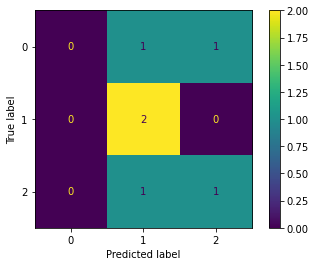

In [10]:
ConfusionMatrixDisplay(example_cm).plot()

In [11]:
def print_metrics(net):
    num_samples = 0
    num_true_predictions = 0
    cumulative_confusion_matrix = np.zeros([10, 10], dtype=np.int32)
    
    with torch.no_grad():
        for images, targets in test_loader:
            outputs = net(images)
            predictions = outputs.argmax(-1)
            num_samples += images.shape[0]
            num_true_predictions += (targets == predictions).sum()
            cumulative_confusion_matrix += confusion_matrix(
                targets, predictions, labels=list(range(10))
            )
    accuracy = num_true_predictions / num_samples
    print(f'Accuracy: {accuracy:.2}')
    ConfusionMatrixDisplay(cumulative_confusion_matrix).plot()
    plt.show()

Initial metrics
Accuracy: 0.094


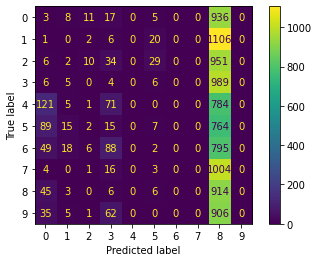

Epoch 0: Loss is 0.27952662110328674
Accuracy: 0.88


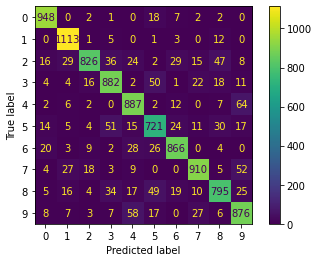

Epoch 1: Loss is 0.16981612145900726
Accuracy: 0.91


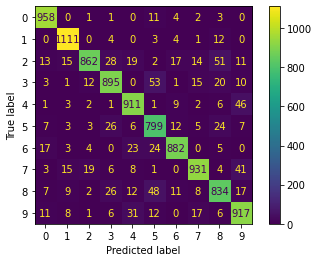

Epoch 2: Loss is 0.12913067638874054
Accuracy: 0.92


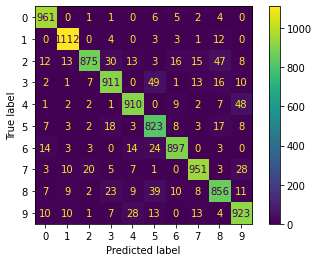

Finished Training


In [12]:
net = NeuralNet()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

print('Initial metrics')
print_metrics(net)

for epoch in range(3):
    for batch_id, (images, targets) in enumerate(train_loader):
        optimizer.zero_grad()

        outputs = net(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        last_loss = loss.item()
    
    print(f'Epoch {epoch}: Loss is {last_loss}')
    print_metrics(net)

print('Finished Training')